## Fandango movie rating analysis

We will be using Fandango movie ratings dataset to analyze whether the Fandango movie ratings are inflated for the new movies.

In [1]:
import numpy as np
import pandas as pd
compar_score = pd.read_csv('fandango_score_comparison.csv')
new_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
compar_score.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
new_ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
compar_score = compar_score[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
new_ratings = new_ratings[['movie', 'year', 'fandango']]

In [5]:
compar_score.describe()

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000
mean,4.089041,3.845205,3848.787671,0.243836
std,0.540386,0.502831,6357.778617,0.152665
min,3.000000,2.700000,35.000000,0.000000
25%,3.500000,3.500000,222.250000,0.100000
50%,4.000000,3.900000,1446.000000,0.200000
75%,4.500000,4.200000,4439.500000,0.400000
max,5.000000,4.800000,34846.000000,0.500000


In [6]:
new_ratings.describe()

,year,fandango
count,214.000000,214.000000
mean,2016.107477,3.894860
std,0.310444,0.516781
min,2016.000000,2.500000
25%,2016.000000,3.500000
50%,2016.000000,4.000000
75%,2016.000000,4.500000
max,2017.000000,5.000000


The sampling of the dataset is not random. The author picked up only the movies that have at least 30 reviews.

In [7]:
new_ratings.sample(10, random_state=4)

,movie,year,fandango
34,Central Intelligence,2016,4.5
199,The Wild Life,2016,3.0
111,Miracles from Heaven,2016,4.5
18,Batman V Superman: Dawn of Justice,2016,4.0
92,Kubo and the Two Strings,2016,4.5
1,13 Hours,2016,4.5
165,The Brothers Grimsby,2016,3.5
134,Pride and Prejudice and Zombies,2016,4.0
91,Kong: Skull Island,2017,4.0
83,Jane Got a Gun,2016,3.5


In [12]:
len(compar_score[compar_score['Fandango_votes']<30])

0

In [13]:
compar_score.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [41]:
compar_score['Year']=compar_score['FILM'].str.extract(r'(?P<Year>20[0-9]{2})', expand=False)

In [42]:
compar_score.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [43]:
compar_score['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [45]:
new_ratings['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [56]:
scores_2015 = compar_score[compar_score['Year']=='2015'].copy()

In [58]:
scores_2016 = new_ratings[new_ratings['year']==2016].copy()

We now have two different datasets from two different years. We can carry out our analysis by comparing these two data sets.

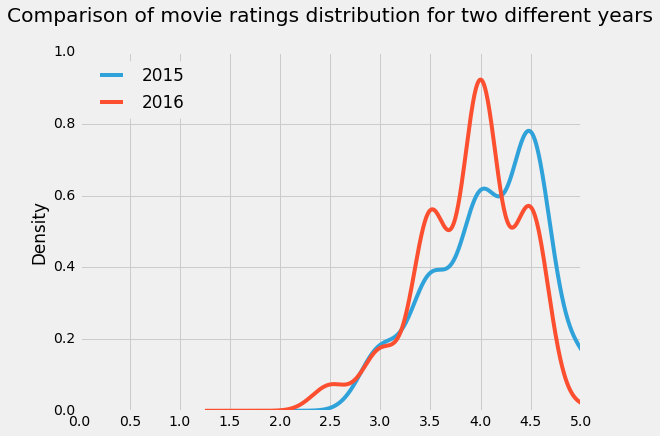

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
scores_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize = (8,6))
scores_2016['fandango'].plot.kde(label='2016', legend=True)
plt.xlim(0,5)
plt.title('Comparison of movie ratings distribution for two different years', y = 1.07)
plt.xticks(np.arange(0,5.1,.5))
plt.show()

The rating distribution of movies for the year 2015 is skewed to the left and has higher ratings compared to 2016 ratings distribution.

In [82]:
scores_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [83]:
scores_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We can clearly observe see that movie ratings for 2015 were slightly inflated in comparison to those of 2016.

In [116]:
def stats(column, year):
    summary = pd.DataFrame()
    summary[year] = [column.mean(), column.median(), column.mode()[0]]
    summary.index = ['mean', 'median', 'mode']
    return summary

In [126]:
a=stats(scores_2015['Fandango_Stars'], 2015)
b=stats(scores_2016['fandango'], 2016)
summary = pd.concat([a,b], axis=1)
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


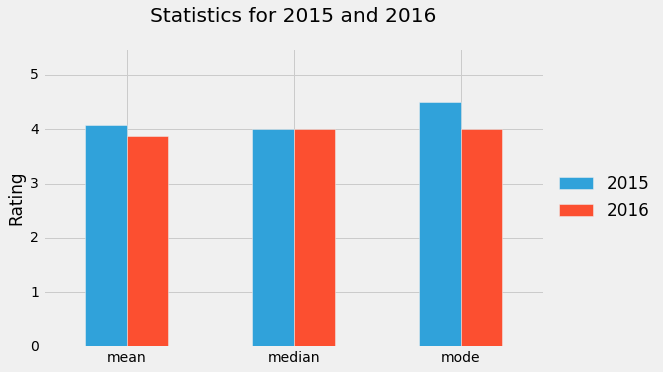

In [147]:
summary.plot.bar(figsize=(8,5))
plt.xticks(rotation=0) 
plt.ylim(0,5.5)
plt.title('Statistics for 2015 and 2016', y=1.07)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Rating')

There is a small difference in the magnitude of means.

Overall, Fandango changed their movie rating system to reflect the real world ratings after 2015.